In [113]:
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
plt.style.use("seaborn-v0_8")

In [115]:
df = pd.read_csv("./data/heart-disease.csv")

df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


47.5
61.0


<Axes: ylabel='Frequency'>

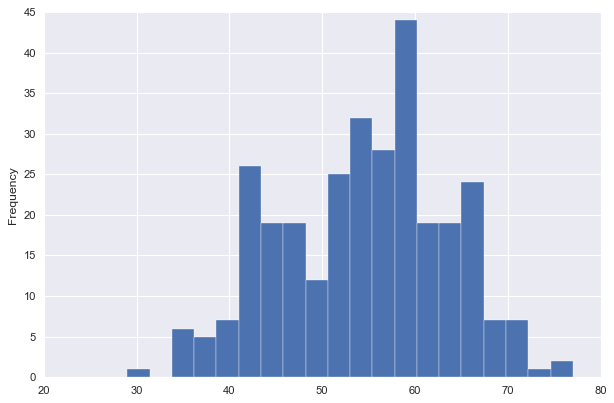

In [116]:
age_q1 = df["age"].quantile(0.25)
age_q3 = df["age"].quantile(0.75)
age_iqr = age_q3 - age_q1

print(age_q1)
print(age_q3)

df_no_outliers = df[
    (df["age"] > (age_q1 - 1.5 * age_iqr)) & (df["age"] < (age_q3 + 1.5 * age_iqr))
]

df_no_outliers["age"].plot.hist(bins=20)

<Axes: xlabel='Age', ylabel='Cholesterol'>

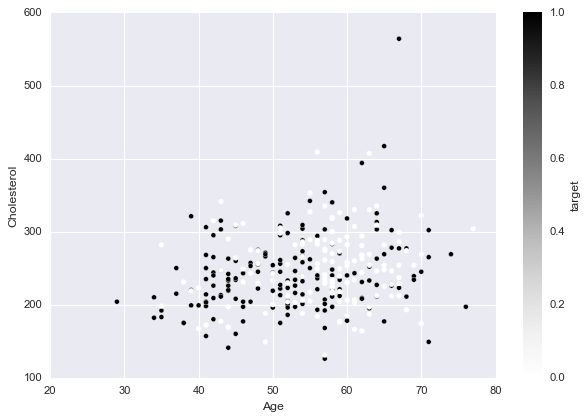

In [117]:
# PyPlot Method

df.plot.scatter(
    x="age",
    y="chol",
    c="target",
    xlabel="Age",
    ylabel="Cholesterol",
)

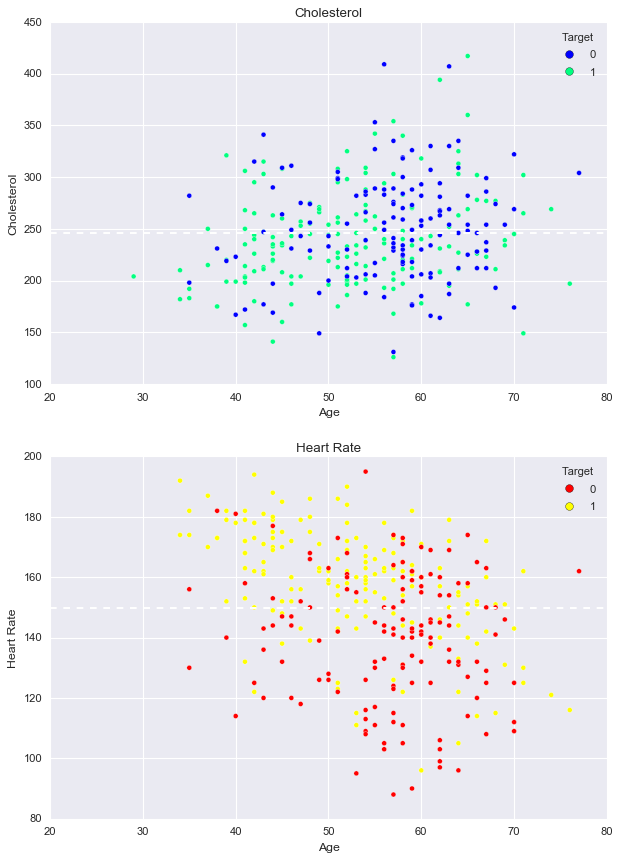

In [118]:
# Object-oriented Method

fig, (ax0, ax1) = plt.subplots(ncols=1, nrows=2, figsize=(8, 12))

ax0.set_title("Cholesterol")
ax0.set_xlabel("Age")
ax0.set_ylabel("Cholesterol")
ax0.set_xlim(20, 80)
ax0.set_ylim(100, 450)
ax0.axhline(y=df["chol"].mean(), linestyle="--")
ax0_plot = ax0.scatter(
    x=df_no_outliers["age"],
    y=df_no_outliers["chol"],
    c=df_no_outliers["target"],
    cmap="winter",
)
ax0.legend(*ax0_plot.legend_elements(), loc="upper right", title="Target")

ax1.set_title("Heart Rate")
ax1.set_xlabel("Age")
ax1.set_ylabel("Heart Rate")
ax1.set_xlim(20, 80)
ax1.set_ylim(80, 200)
ax1.axhline(y=df["thalach"].mean(), linestyle="--")
ax1_plot = ax1.scatter(
    x=df_no_outliers["age"],
    y=df_no_outliers["thalach"],
    c=df_no_outliers["target"],
    cmap="autumn",
)
ax1.legend(*ax1_plot.legend_elements(), loc="upper right", title="Target")

fig.savefig("./figures/heart-disease-analysis.png", transparent=True)